##TSF Grip Task 3
Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/SampleSuperstore (1).csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.shape

(9994, 13)

In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

##EDA

<ipython-input-8-4f3a2d78d711>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=25`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['Sales'],color='red',label='Sales',shade=True,bw=25)
<ipython-input-8-4f3a2d78d711>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sales'],color='red',label='Sales',shade=True,bw=25)
<ipython-input-8-4f3a2d78d711>:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=25`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['Profit'],color='Blue',label='Profit',shade=True,bw=25)
<ipython-input-8-4f3a2d78d711>:3: FutureWarning: 

`shade` is now depre

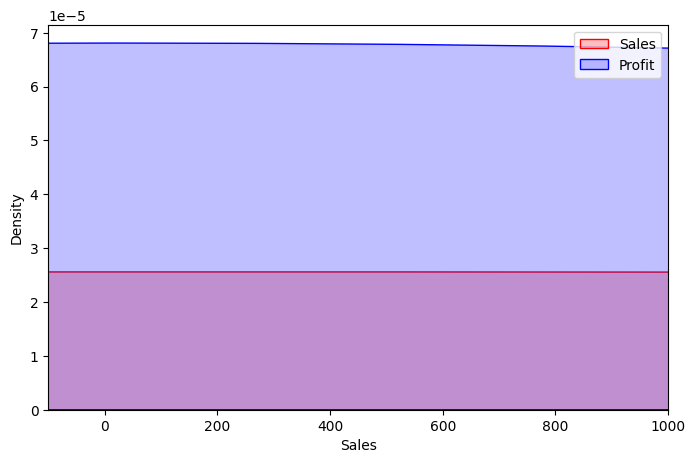

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='red',label='Sales',shade=True,bw=25)
sns.kdeplot(df['Profit'],color='Blue',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

Analysis using Pairplot of each column

[1] Based on the Catagory




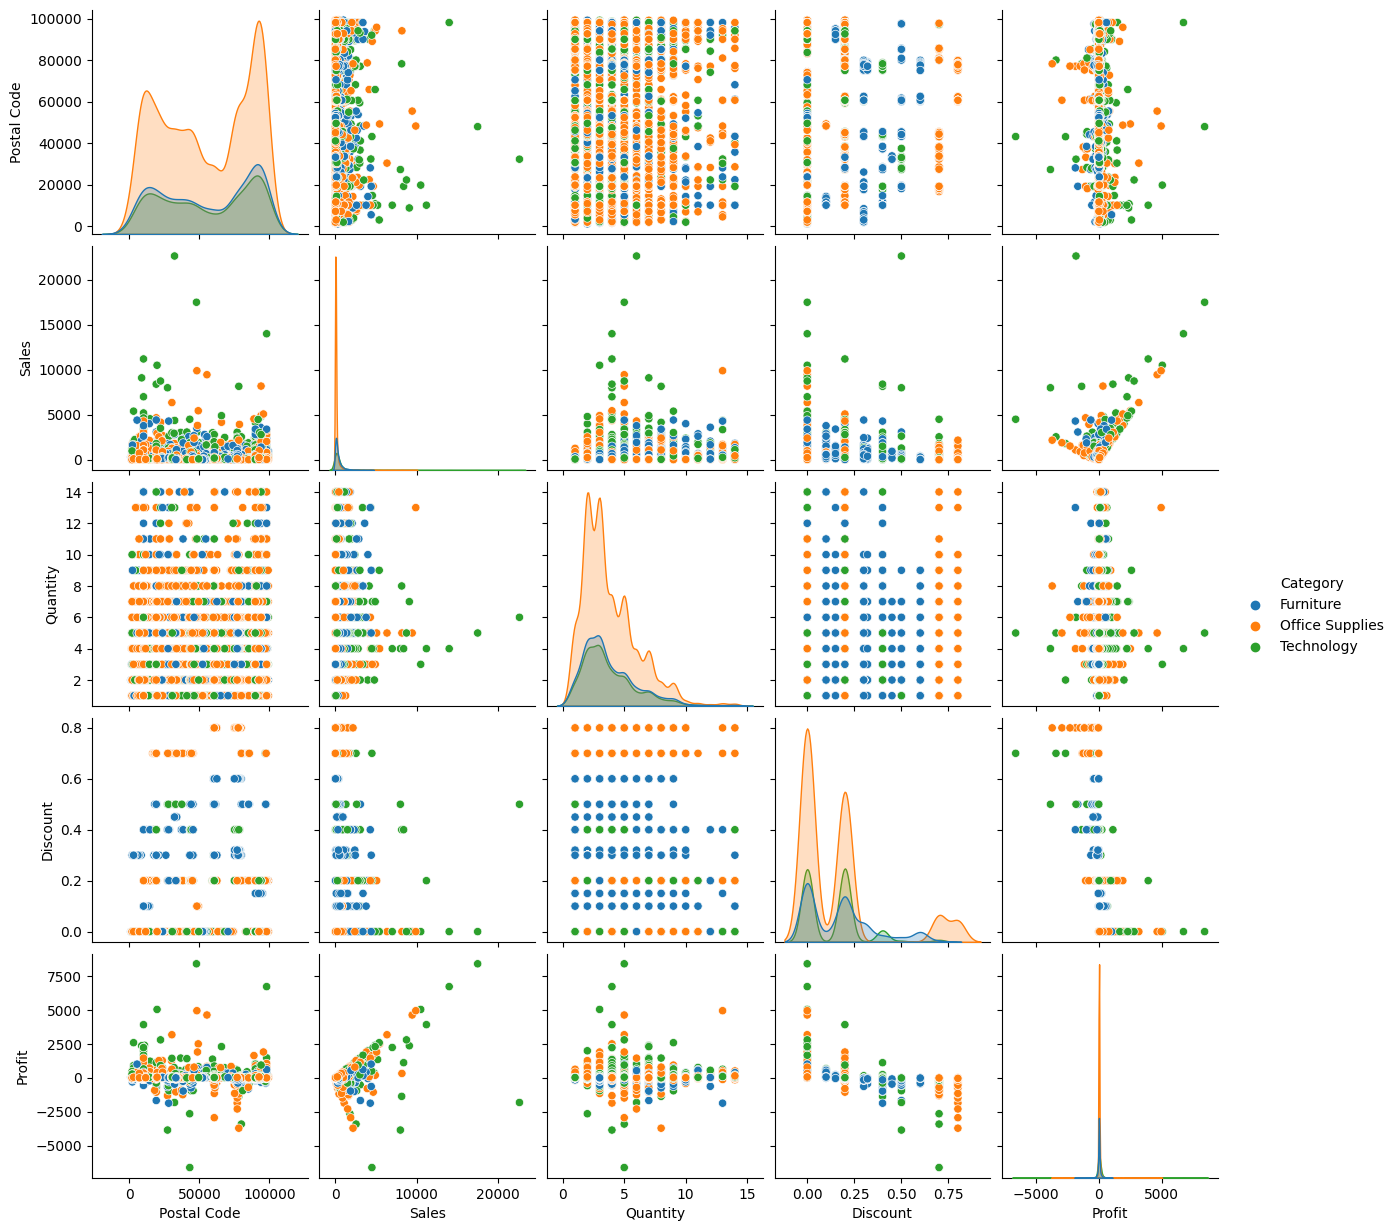

In [9]:
sns.pairplot(df,hue='Category')

[2] Based on Region

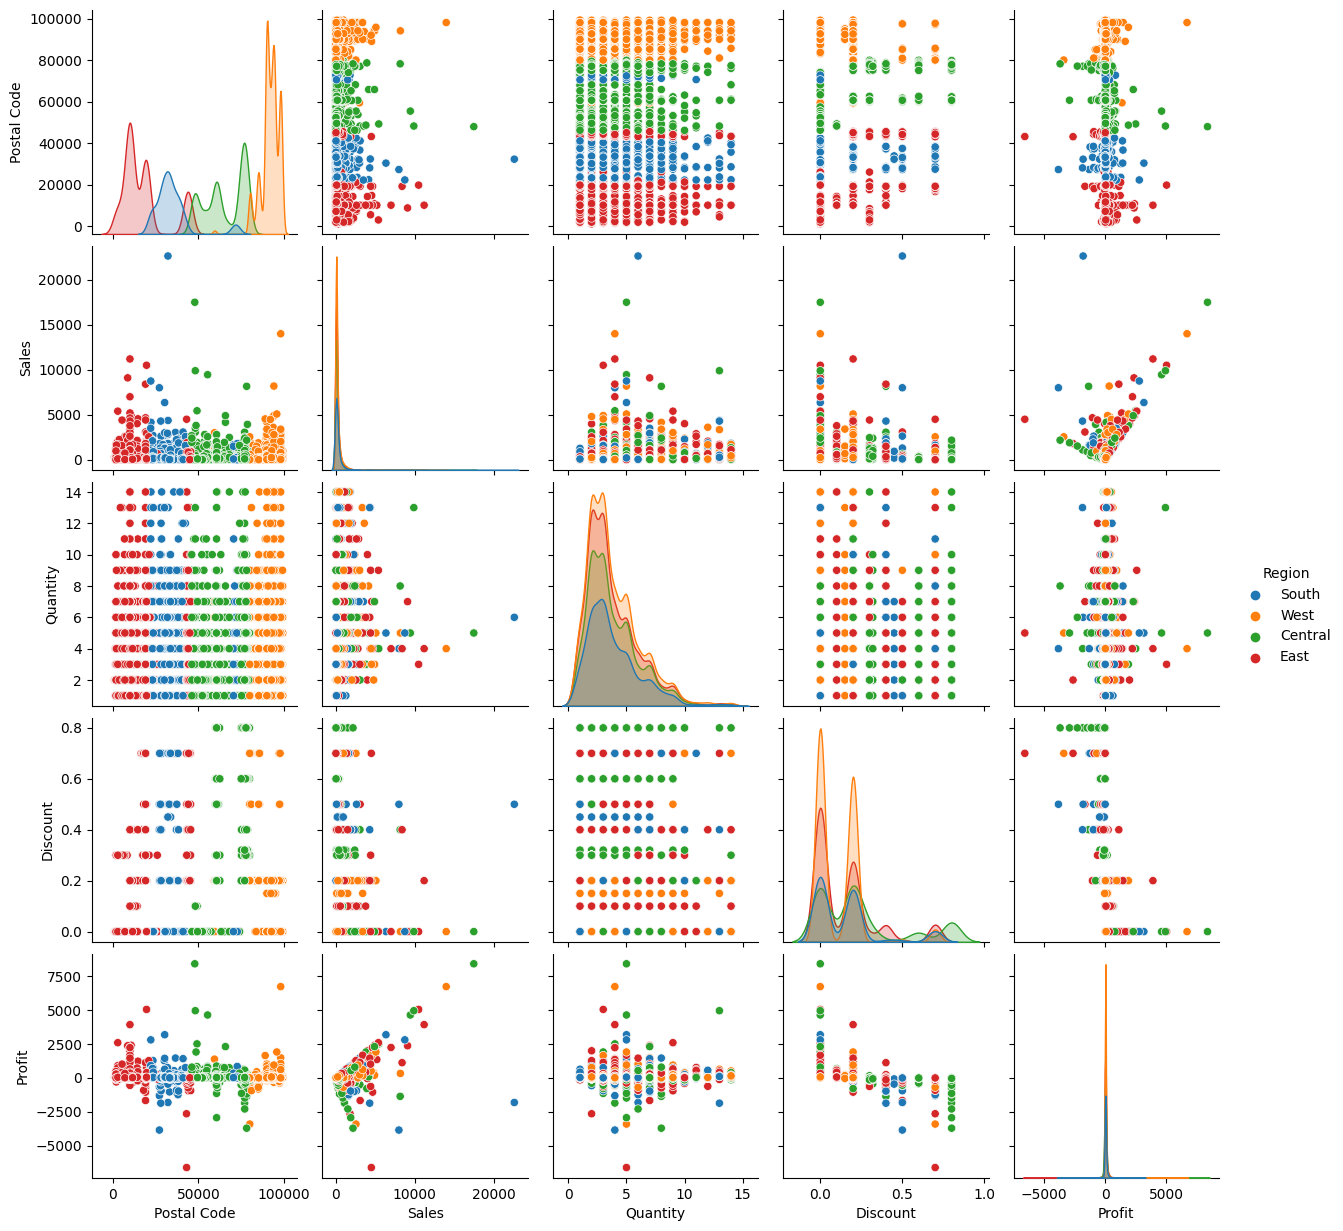

In [10]:
sns.pairplot(df,hue='Region')

[3] Based on the segment

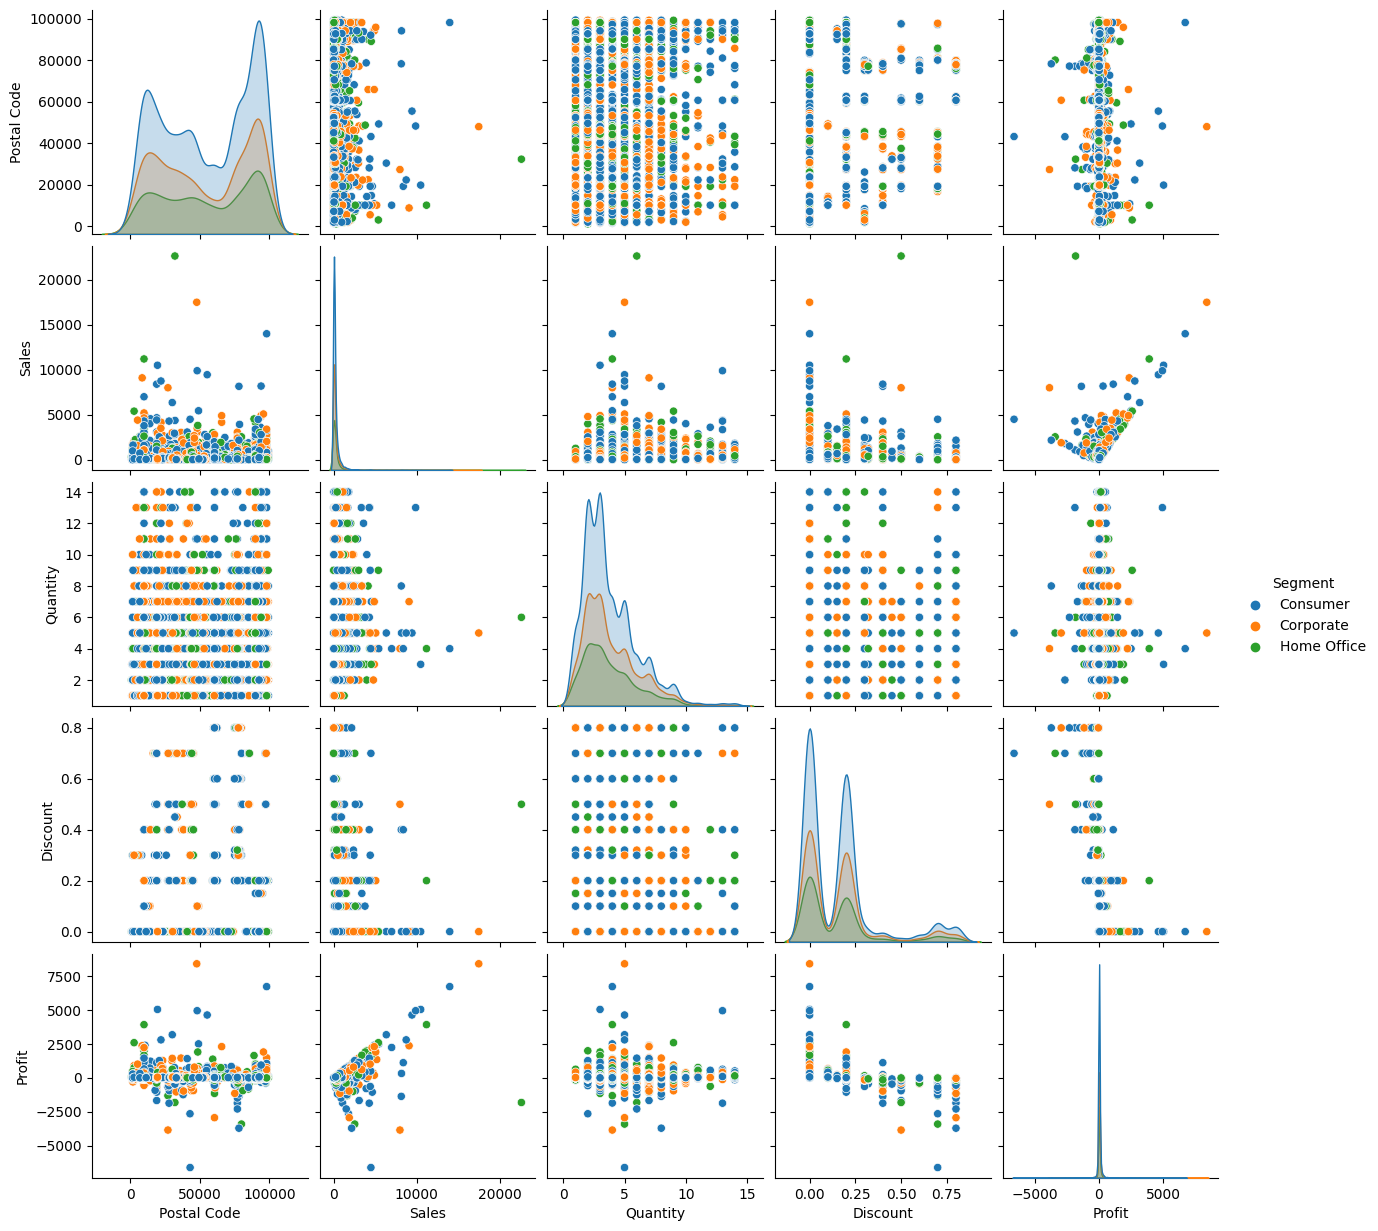

In [11]:
sns.pairplot(df,hue='Segment')

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<Axes: >

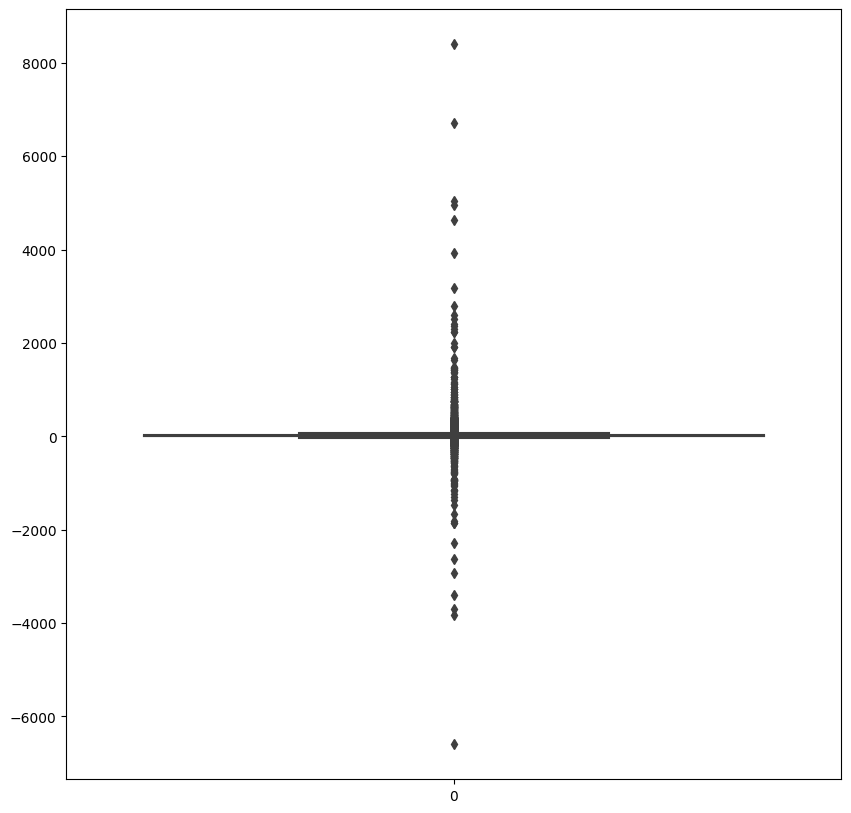

In [14]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(df['Profit'])

In [15]:
Q1 = df.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')

Q3 = df.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

In [16]:
IQR = Q3 - Q1

print(IQR)

Postal Code    66785.00000
Sales            192.66000
Quantity           3.00000
Discount           0.20000
Profit            27.63525
dtype: float64


<Axes: xlabel='Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

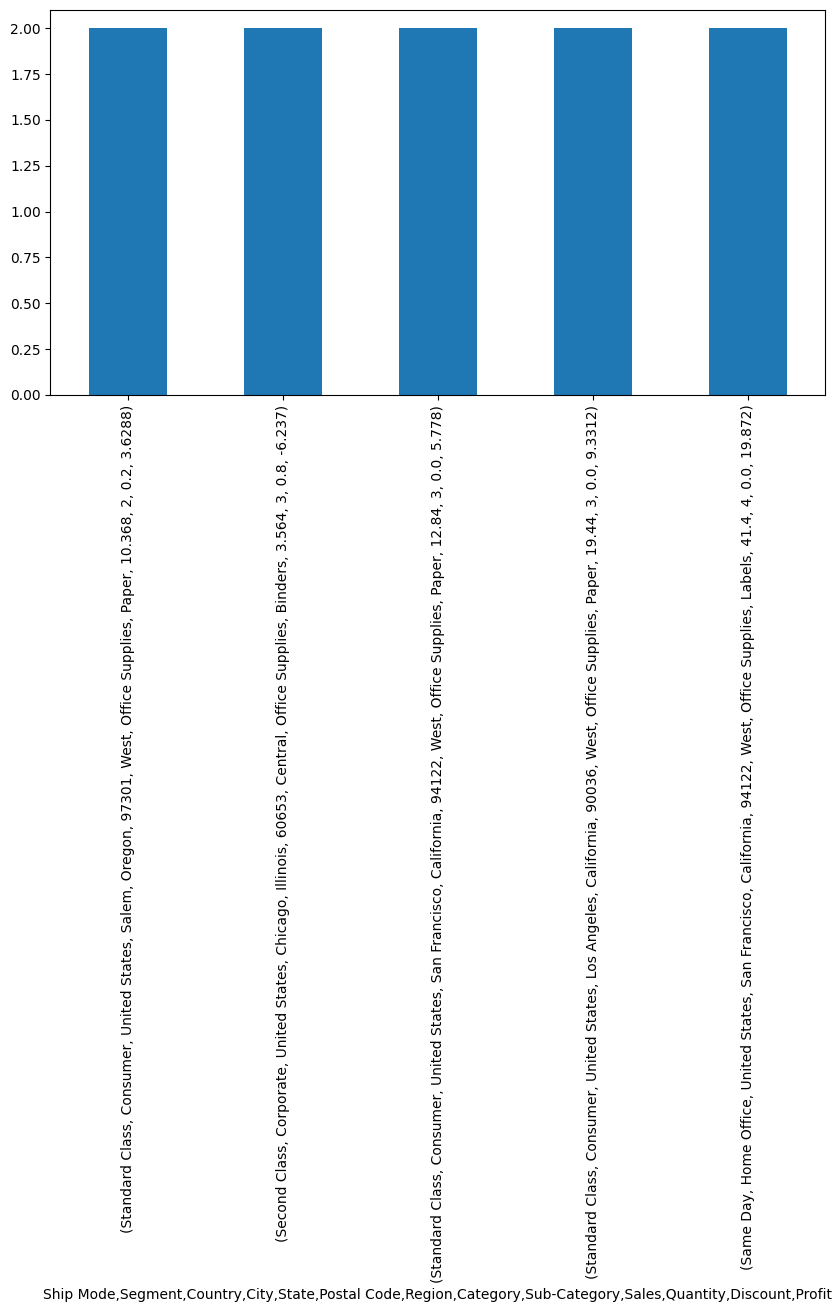

In [17]:
df.value_counts().nlargest().plot(kind = 'bar' , figsize = (10 , 5))

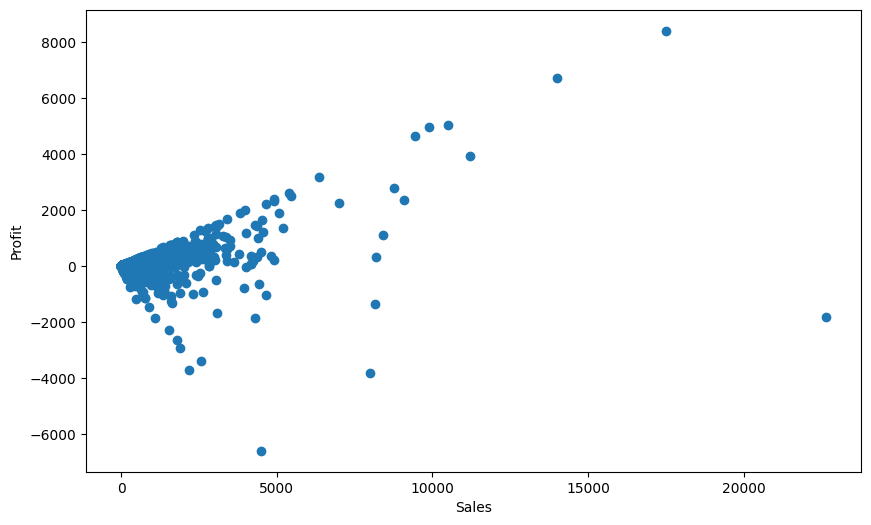

In [13]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()